# K線型態哪種最有用？

## 取得價格資料、計算獲利

In [13]:
from finlab.data import Data

data = Data()
open_adj = data.get_adj('開盤價') # get_adj有考慮除權息還有增減資的開盤價

#報酬率
profit1 =  open_adj.shift(-2) / open_adj.shift(-1)  # 報酬率 = 明天進行買入，後天進行賣出
profit5 =  open_adj.shift(-6) / open_adj.shift(-1)  # 五天
profit10 = open_adj.shift(-11) / open_adj.shift(-1) # 十天
profit60 = open_adj.shift(-61) / open_adj.shift(-1) # 六十天

profit1 = profit1.unstack() # unstack：將資料的行“旋轉”為列
profit5 = profit5.unstack()
profit10 = profit10.unstack()
profit60 = profit60.unstack()

## 計算K線型態

In [29]:
import talib

# dir(talib)

#Candlestick pattern
df = data.talib('CDL2CROWS')
df = df.unstack()

# profit10[df<10]
# 對報酬率取平均
profit10[df < 0].mean() 


1.0069706988019689

## 計算每一種K線型態的獲利

In [45]:
results = {}
counts = {}
from talib import abstract

for fname in [fname for fname in dir(abstract) if fname[:3] == 'CDL']:
    df = data.talib(fname)
    df = df.unstack()
    pos = df > 0
    neg = df < 0
    
    # x天之後的報酬率
    results['NEG_' + fname] = {
        'profit1': profit1 [neg].mean(),
        'profit5': profit5 [neg].mean(),
        'profit10':profit10[neg].mean(),
        'profit60':profit60[neg].mean(),
        'count': sum(neg),
    }
    results['POS_' + fname] = {
        'profit1': profit1 [pos].mean(),
        'profit5': profit5 [pos].mean(),
        'profit10':profit10[pos].mean(),
        'profit60':profit60[pos].mean(),
        'count': sum(pos),
    }
#     print(fname)
    neg
    

## 哪一種蠟燭型態最好？

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9)

df_result = pd.DataFrame(results).transpose()

profit_names = ['profit1', 'profit5', 'profit10', 'profit60']
# dropna過濾缺失值
df = pd.DataFrame({name:df_result[name] for name in profit_names}).dropna()
df.sort_values('profit10')

,profit1,profit5,profit10,profit60
POS_CDLCONCEALBABYSWALL,1.000563,0.968385,0.983234,0.966951
POS_CDLABANDONEDBABY,0.996003,0.992165,0.991305,1.003123
NEG_CDLRISEFALL3METHODS,0.998560,0.988206,0.994191,1.007803
NEG_CDL3LINESTRIKE,0.997621,0.998817,0.996477,0.988439
POS_CDLTASUKIGAP,1.000592,0.994412,0.997313,1.021120
POS_CDL3LINESTRIKE,0.998995,0.999101,0.998801,1.012960
NEG_CDLIDENTICAL3CROWS,1.000414,0.999916,0.999165,1.008109
POS_CDLDOJISTAR,0.999461,1.002811,0.999429,1.024684
NEG_CDLKICKING,0.997394,0.994903,0.999615,1.043190
POS_CDLENGULFING,0.999871,0.997809,0.999745,1.031118


## 蠟燭型態歷史資料繪製

In [46]:
# 開高低收成交量
high = data.get("最高價")
low = data.get("最低價")
open_ = data.get("開盤價")
close = data.get("收盤價")
volume = data.get("成交股數")

# 找到蠟燭型態
df = data.talib("CDLTRISTAR")
signals = (df > 0) & (volume.rolling(10).mean() > 100000)
signals = signals.unstack()
signals = signals[signals > 0]
signals.index.levels[0].name = 'stock_id'
signals = signals.reset_index()

,open,high,close,low,volume
date,,,,,
2019-07-31,18.50,18.50,18.38,18.30,512952.0
2019-08-01,18.29,18.30,18.14,18.10,753678.0
2019-08-02,17.96,17.96,17.83,17.76,1182821.0
2019-08-05,17.81,17.81,17.50,17.50,745420.0
2019-08-06,17.38,17.38,17.26,17.00,1511228.0
2019-08-07,17.30,17.38,17.17,17.16,410790.0
2019-08-08,17.20,17.30,17.24,17.12,738632.0
2019-08-12,17.20,17.30,17.21,17.10,433199.0
2019-08-13,17.13,17.25,17.12,17.12,422200.0


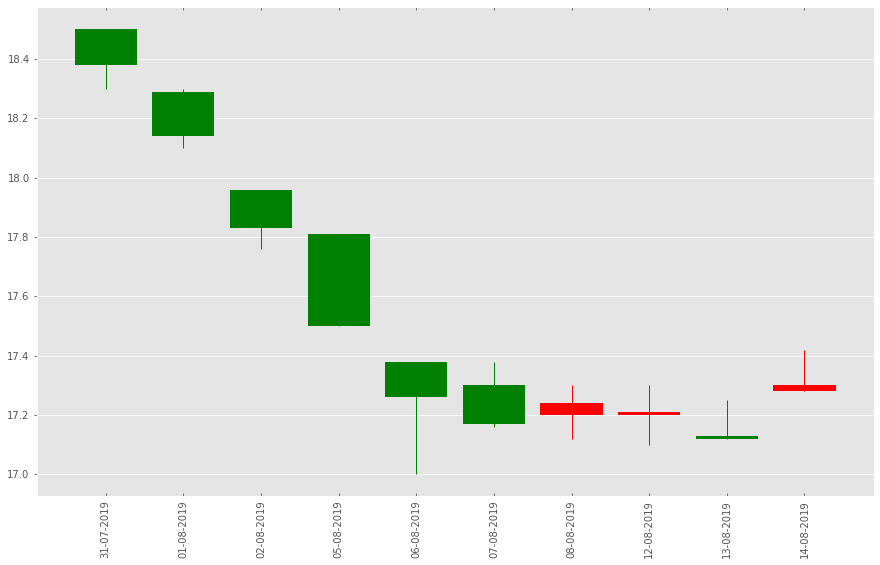

In [47]:
import pandas as pd
from finlab.plot_candles import plot_candles
import matplotlib.pyplot as plt

ind = 6
stock_id = signals['stock_id'].iloc[ind]
date = signals['date'].iloc[ind]

o = open_[stock_id].loc[:date].tail(10)
h = high[stock_id].loc[:date].tail(10)
l = low[stock_id].loc[:date].tail(10)
c = close[stock_id].loc[:date].tail(10)
v = volume[stock_id].loc[:date].tail(10)

df = pd.DataFrame({'open':o, 'high':h, 'close':c, 'low':l, 'volume':v}).dropna(how='all')
plot_candles(start_time=o.index[0], end_time=o.index[-1], pricing=df,)

df